<a href="https://colab.research.google.com/github/yz2873/Unsupervised_Learning/blob/master/PandasAI_for_titanicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!ls requirements.txt

requirements.txt


In [3]:
!pip install -r requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.9/815.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.4/207.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!pip install pandasai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.4/183.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.0/810.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.1
    Uninstalling pydantic-2.6.1:
      Successfully uninstalled pydantic-2.6.1
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not curren

In [1]:
!pip show pandasai openai langchain

Name: pandasai
Version: 1.5.19
Summary: PandasAI is a Python library that integrates generative artificial intelligence capabilities into Pandas, making dataframes conversational.
Home-page: 
Author: Gabriele Venturi
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: astor, duckdb, faker, ipython, matplotlib, openai, pandas, pillow, pydantic, python-dotenv, requests, scipy, sqlalchemy
Required-by: 
---
Name: openai
Version: 1.12.0
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: langchain-openai, llmx, pandasai
---
Name: langchain
Version: 0.1.7
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist

In [2]:
from google.colab import userdata

In [3]:
openai_api_key = userdata.get('OpenAIApiKey')

In [5]:
import pandas as pd
import pandasai as pdai

In [8]:
#from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from pandasai.llm.starcoder import Starcoder
#from pandasai.llm.open_assistant import OpenAssistant
from pandasai.llm.google_palm import GooglePalm

In [9]:
df = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "gdp": [21400000, 2940000, 2830000, 3870000, 2160000, 1350000, 1780000, 1320000, 516000, 14000000],
    "happiness_index": [7.3, 7.2, 6.5, 7.0, 6.0, 6.3, 7.3, 7.3, 5.9, 5.0]
})

In [10]:
df.head(n=10)

,country,gdp,happiness_index
0,United States,21400000,7.3
1,United Kingdom,2940000,7.2
2,France,2830000,6.5
3,Germany,3870000,7.0
4,Italy,2160000,6.0
5,Spain,1350000,6.3
6,Canada,1780000,7.3
7,Australia,1320000,7.3
8,Japan,516000,5.9
9,China,14000000,5.0


from matplotlib import pyplot as plt
_df_0['gdp'].plot(kind='hist', bins=20, title='gdp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['happiness_index'].plot(kind='hist', bins=20, title='happiness_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='gdp', y='happiness_index', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['gdp'].plot(kind='line', figsize=(8, 4), title='gdp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['happiness_index'].plot(kind='line', figsize=(8, 4), title='happiness_index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
llm = OpenAI(api_token=openai_api_key)

In [12]:
from pandasai import SmartDataframe

In [13]:
df = SmartDataframe(df, config={"llm": llm})

In [14]:
output = df.chat('Which are the 5 happiest countries?')

In [15]:
print(output)

          country       gdp  happiness_index
0   United States  21400000              7.3
6          Canada   1780000              7.3
7       Australia   1320000              7.3
1  United Kingdom   2940000              7.2
3         Germany   3870000              7.0


In [17]:
output = df.chat('Which are the 3 high gdp countries?')

In [18]:
type(output)

str

In [19]:
output

'The top 3 countries with the highest GDP are: United States, China, Germany.'

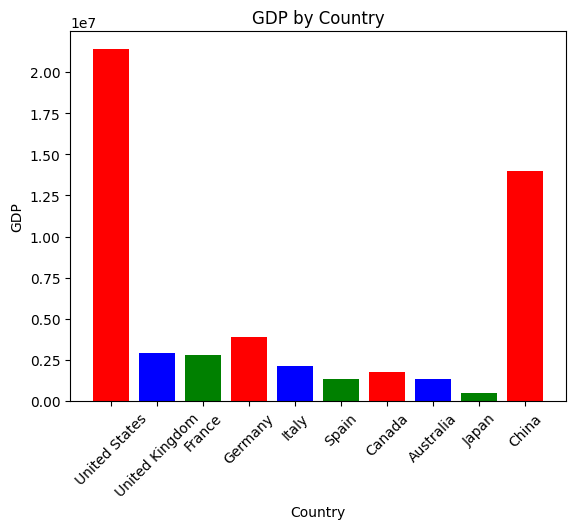

In [21]:
df.chat("Plot the histogram of countries showing for each the gpd, using different colors for each bar");

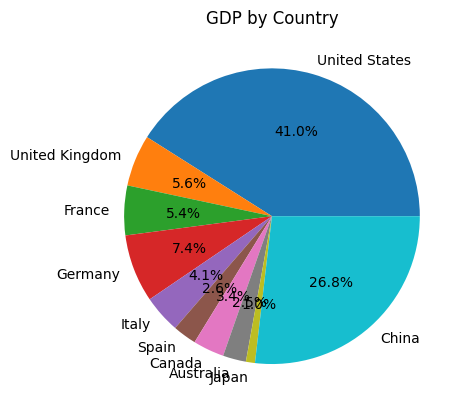

In [22]:
df.chat("Plot a pie chart of countries showing for each the gpd");

### **Input a titanic.csv file**

In [23]:
!ls titanic.csv

titanic.csv


In [30]:
df = pd.read_csv('titanic.csv')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df1 = SmartDataframe(df, config={"llm": llm})

In [33]:
df1.chat('How many people died?')

549

In [40]:
df[df["Survived"]==0]['Survived'].count()

549

In [41]:
df1.chat('What was the average age of those who survived?')

28.343689655172415

In [43]:
avg_age_survived = df[df["Survived"]==1]['Age'].mean()
avg_age_survived

28.343689655172415

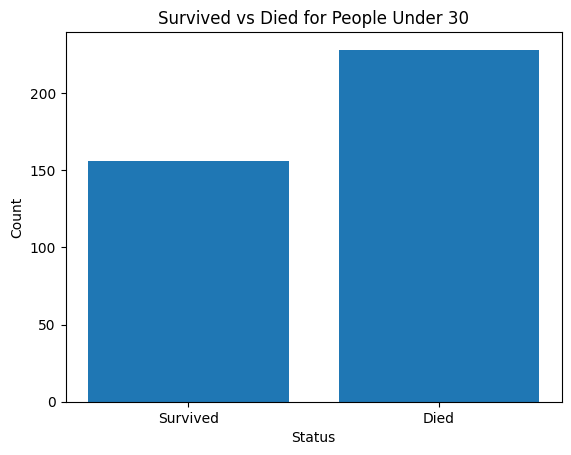

'/content/exports/charts/temp_chart.png'

In [47]:
df1.chat('Make plot of died versus survived for peopl under 30',)